In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
file = np.load("data/ZFT_training_images_26k_iband_time_series_images_EPL.npz", allow_pickle = True)
file_full = np.load("./data/ZTF_training_images_26k_iband_image_properties_EPL.npz", allow_pickle = True)
print(file_full.files)

['data_labels', 'z_source_list', 'point_amp_list', 'abs_mag_ps_list', 'app_mag_ps_list', 'theta_E_list', 'PSF_list', 'colour_param', 'stretch_param', 'max_time_delay', 'z_lens_list', 'time_stamps', 'ra_source_list', 'dec_source_list', 'magnification_list']


In [17]:
print(file.files)

catalog = file['catalog_time_series']
labels = file['data_labels']     # array de liste de taille 2 remplie de 0 et 1      longueur : 929
times = file['time_stamps']      # array contenant des listes de taille variable     longueur : 929

mags = file_full['app_mag_ps_list']

theta_e_list = file_full['theta_E_list']
amplification = file_full['point_amp_list']

['catalog_time_series', 'time_stamps', 'data_labels']


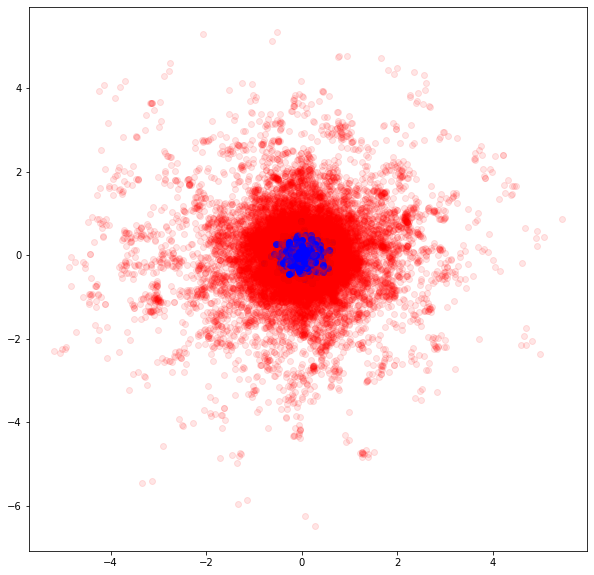

In [12]:
plt.figure(figsize = (10,10))
for indx, cat in enumerate(catalog):
    #print('CAT', cat)
    x_cat = []
    y_cat = []
    x2_cat = []
    y2_cat = []
    flux = []
    for c in cat:
        try:
            #print('try', c['flux'])
            x_cat.append(*c['x'])
            y_cat.append(*c['y'])
            x2_cat.append(*c['x2'])
            y2_cat.append(*c['y2'])
            flux.append(*c['cflux'])
        except:
        # quand c est vide, pour ne pas avoir de nan values, on remplace les trous par la moyenne des valeurs
        # ou None pour le cas de x2, y2, flux
        
        # Mais pq remplir les listes x_cat et y_cat vu qu'elles ne sont pas utilisées pour après? 
            x_cat.append(np.nan)
            y_cat.append(np.nan)
            x2_cat.append(None)
            y2_cat.append(None)
            flux.append(None)
            
        #print(len(c), c['flux'])
        #print(x_cat)
#    plt.title(labels[indx])
#    plt.plot(np.array(x_cat), np.array(y_cat), 'o', label = 'y_cat VS x_cat')
#    plt.legend()
#    plt.show()
#    plt.plot( np.array(x2_cat), 'o', label = 'x2_cat')
#    plt.legend()
#    plt.show()
#    plt.plot( np.array(y2_cat), 'o', label = 'y2_cat')
#    plt.legend()
#    plt.show()
#    plt.plot(np.array(flux), label='flux')
#    plt.legend()
#    plt.show()
    
    if labels[indx][0] == 0:
        #print('00000000', labels[indx], 'BLEUUUUU')
        #plt.plot(times[indx], flux, 'b', alpha = 0.3)
        plt.plot(np.array(x_cat)-np.nanmean(x_cat), np.array(y_cat)-np.nanmean(y_cat), 'ob', alpha = 1)
        
    else:
    
        #print(labels[indx], 'ROUUUUGE')
        #plt.plot(times[indx], flux, 'r')
        plt.plot(np.array(x_cat)-np.nanmean(x_cat), np.array(y_cat)-np.nanmean(y_cat), 'or', alpha = 0.1)
#plt.xlim([-2,2])
#plt.ylim([-2, 2])

plt.show()

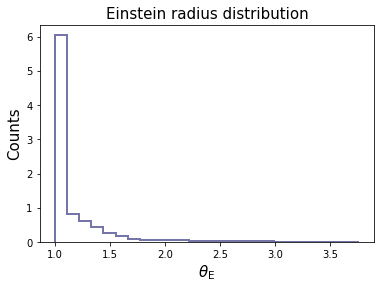

In [15]:
plt.hist(theta_e_list, bins=25, histtype='step', density=True, lw=2, color="midnightblue", alpha=0.6);
#plot(theta_E, 9*pdf,'-', color="darkgoldenrod", lw=5, alpha=0.6, label=r'$\mathrm{Radek \ MC}$')
plt.xlabel(r"$\theta_{\mathrm{E}}$", fontsize=15);
#xlabel(r"$m$", fontsize=15);
plt.ylabel("Counts", fontsize=15);
plt.title("Einstein radius distribution", fontsize=15);
#xlim(0,3.6);
#savefig("theta_E_distribution_EPL2.pdf", bbox_inches="tight")

In [16]:
plt.hist(amplification, bins=25, histtype='step', density=True, lw=2, color="midnightblue", alpha=0.6);
#plot(theta_E, 9*pdf,'-', color="darkgoldenrod", lw=5, alpha=0.6, label=r'$\mathrm{Radek \ MC}$')
plt.xlabel(r"$\theta_{\mathrm{E}}$", fontsize=15);
#xlabel(r"$m$", fontsize=15);
plt.ylabel("Counts", fontsize=15);
plt.title("Einstein radius distribution", fontsize=15);
#xlim(0,3.6);
#savefig("theta_E_distribution_EPL2.pdf", bbox_inches="tight")

NameError: name 'amplification' is not defined